In [1]:
#data manipulation
import pandas as pd
import numpy as np
import geopandas as gpp

#plotting
import seaborn as sns
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.io as pio

#cluster analysis
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [2]:
df = pd.read_csv('/Users/joannarashid/Documents/GitHub/Team-Project-Practicum-6748/2014_2020_all_tract.csv')

In [3]:
#EDA
df.head()

longitude  latitude     avg_co2  xco2_std  year    ST        STATE ST_ABBR  \
0      -74.5      40.5  403.779935  2.676985  2016  34.0   New Jersey      NJ   
1      -74.5      40.5  408.250298  2.722180  2018  34.0   New Jersey      NJ   
2      -74.5      40.5  397.730751  3.297426  2014  34.0   New Jersey      NJ   
3      -74.5      40.5  413.296552  2.789300  2020  34.0   New Jersey      NJ   
4      -74.5      40.5  400.576686  2.817643  2015  34.0   New Jersey      NJ   

    STCNTY       COUNTY  ...  housing_type overall_svi  co2_1yr_change  \
0  34005.0   Burlington  ...        0.1516      0.6031             NaN   
1  34005.0   Burlington  ...        0.0617      0.4835        4.470362   
2  34005.0   Burlington  ...        0.1606      0.6107      -10.519547   
3  34005.0   Burlington  ...        0.0703      0.4542       15.565801   
4  34005.0   Burlington  ...        0.1561      0.6069      -12.719866   

   co2_6yr_change  co2_1yr_pct_change  co2_6yr_pct_change  co2_5yr_pct_change  \
0             NaN                 NaN                 NaN                 NaN   
1             NaN            0.011071                 NaN                 NaN   
2             NaN           -0.025767                 NaN                 NaN   
3             NaN            0.039137                 NaN                 NaN   
4             NaN           -0.030777                 NaN                 NaN   

   co2_4yr_pct_change  co2_3yr_pct_change  co2_2yr_pct_change  
0                 NaN                 NaN                 NaN  
1                 NaN                 NaN                 NaN  
2                 NaN                 NaN           -0.014981  
3                 NaN            0.023569            0.012361  
4           -0.007933           -0.018796            0.007155  

[5 rows x 30 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487736 entries, 0 to 487735
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   longitude           487736 non-null  float64
 1   latitude            487736 non-null  float64
 2   avg_co2             487736 non-null  float64
 3   xco2_std            487736 non-null  float64
 4   year                487736 non-null  int64  
 5   ST                  487736 non-null  float64
 6   STATE               487736 non-null  object 
 7   ST_ABBR             487736 non-null  object 
 8   STCNTY              487736 non-null  float64
 9   COUNTY              487736 non-null  object 
 10  FIPS                487736 non-null  int64  
 11  LOCATION            487736 non-null  object 
 12  year.1              487736 non-null  int64  
 13  total_population    487736 non-null  float64
 14  housing_units       487736 non-null  float64
 15  num_households      487736 non-nul

In [5]:
df.describe()

longitude       latitude        avg_co2       xco2_std  \
count  487736.000000  487736.000000  487736.000000  487736.000000   
mean      -91.645187      37.949409     405.293339       2.238813   
std        16.491108       5.183383       5.048339       0.562897   
min      -168.500000      23.500000     395.892359       0.906687   
25%       -97.500000      34.500000     400.472697       1.728153   
50%       -86.500000      38.500000     405.795074       2.253219   
75%       -79.500000      41.500000     409.945864       2.727939   
max       -67.500000      64.500000     414.554260       3.853587   

                year             ST         STCNTY          FIPS  \
count  487736.000000  487736.000000  487736.000000  4.877360e+05   
mean     2016.882119      27.709730   27795.339329  2.779560e+10   
std         1.966782      15.775309   15799.142697  1.579915e+10   
min      2014.000000       1.000000    1001.000000  1.001020e+09   
25%      2015.000000      12.000000   12127.000000  1.212708e+10   
50%      2017.000000      27.000000   27123.000000  2.712304e+10   
75%      2019.000000      41.000000   41017.000000  4.101700e+10   
max      2020.000000      56.000000   56045.000000  5.604595e+10   

              year.1  total_population  ...   housing_type    overall_svi  \
count  487736.000000     487736.000000  ...  487736.000000  487736.000000   
mean     2016.882119       4269.537595  ...      -7.030040      -7.652933   
std         1.966782       2058.593773  ...      85.402816      88.938695   
min      2014.000000          0.000000  ...    -999.000000    -999.000000   
25%      2015.000000       2873.000000  ...       0.254500       0.249900   
50%      2017.000000       4021.000000  ...       0.503000       0.501400   
75%      2019.000000       5348.000000  ...       0.749600       0.751600   
max      2020.000000      70271.000000  ...       1.000000       1.000000   

       co2_1yr_change  co2_6yr_change  co2_1yr_pct_change  co2_6yr_pct_change  \
count   414911.000000    62256.000000       414911.000000        62256.000000   
mean         0.061043        0.368472            0.000334            0.001100   
std          7.733517        7.774344            0.019098            0.019202   
min        -16.139628      -16.211408           -0.039154           -0.039213   
25%         -5.990796       -5.555267           -0.014840           -0.013731   
50%          1.823247        1.903374            0.004495            0.004716   
75%          5.765277        7.148259            0.014419            0.017707   
max         16.243645       16.216866            0.040918            0.040954   

       co2_5yr_pct_change  co2_4yr_pct_change  co2_3yr_pct_change  \
count       123611.000000       196436.000000       269261.000000   
mean            -0.000200            0.000360            0.000287   
std              0.019494            0.019002            0.018286   
min             -0.039012           -0.039427           -0.039487   
25%             -0.015920           -0.014283           -0.013661   
50%             -0.004184           -0.004740            0.004952   
75%              0.015933            0.014382            0.013085   
max              0.041011            0.040796            0.040650   

       co2_2yr_pct_change  
count       342086.000000  
mean             0.000046  
std              0.018964  
min             -0.038986  
25%             -0.014981  
50%              0.002924  
75%              0.015859  
max              0.040497  

[8 rows x 26 columns]

In [6]:
df.columns

Index(['longitude', 'latitude', 'avg_co2', 'xco2_std', 'year', 'ST', 'STATE',
       'ST_ABBR', 'STCNTY', 'COUNTY', 'FIPS', 'LOCATION', 'year.1',
       'total_population', 'housing_units', 'num_households', 'unemployment',
       'socioeconomic', 'household_comp', 'minority_status', 'housing_type',
       'overall_svi', 'co2_1yr_change', 'co2_6yr_change', 'co2_1yr_pct_change',
       'co2_6yr_pct_change', 'co2_5yr_pct_change', 'co2_4yr_pct_change',
       'co2_3yr_pct_change', 'co2_2yr_pct_change'],
      dtype='object')

In [7]:
#define target vars
df.columns
co2vars = ['avg_co2', 'xco2_std','co2_1yr_change', 'co2_6yr_change', 'co2_1yr_pct_change',
           'co2_6yr_pct_change', 'co2_5yr_pct_change', 'co2_4yr_pct_change',
           'co2_3yr_pct_change', 'co2_2yr_pct_change']

labelvars = ['longitude', 'latitude','year', 'ST', 'STATE',
             'ST_ABBR', 'STCNTY', 'COUNTY', 'FIPS', 'LOCATION']

svivars = ['total_population', 'housing_units', 'num_households', 'unemployment',
          'socioeconomic', 'household_comp', 'minority_status', 'housing_type',
          'overall_svi']

vars = svivars + co2vars

In [8]:
#creating a small sample for testing
# new df with 20000 randomly sampled rows to speed up plots
small_df = pd.DataFrame(np.array(df.sample(20000)))

#Rename plot_df's columns
small_df.columns = df.columns

AttributeError: 'PairGrid' object has no attribute 'show'

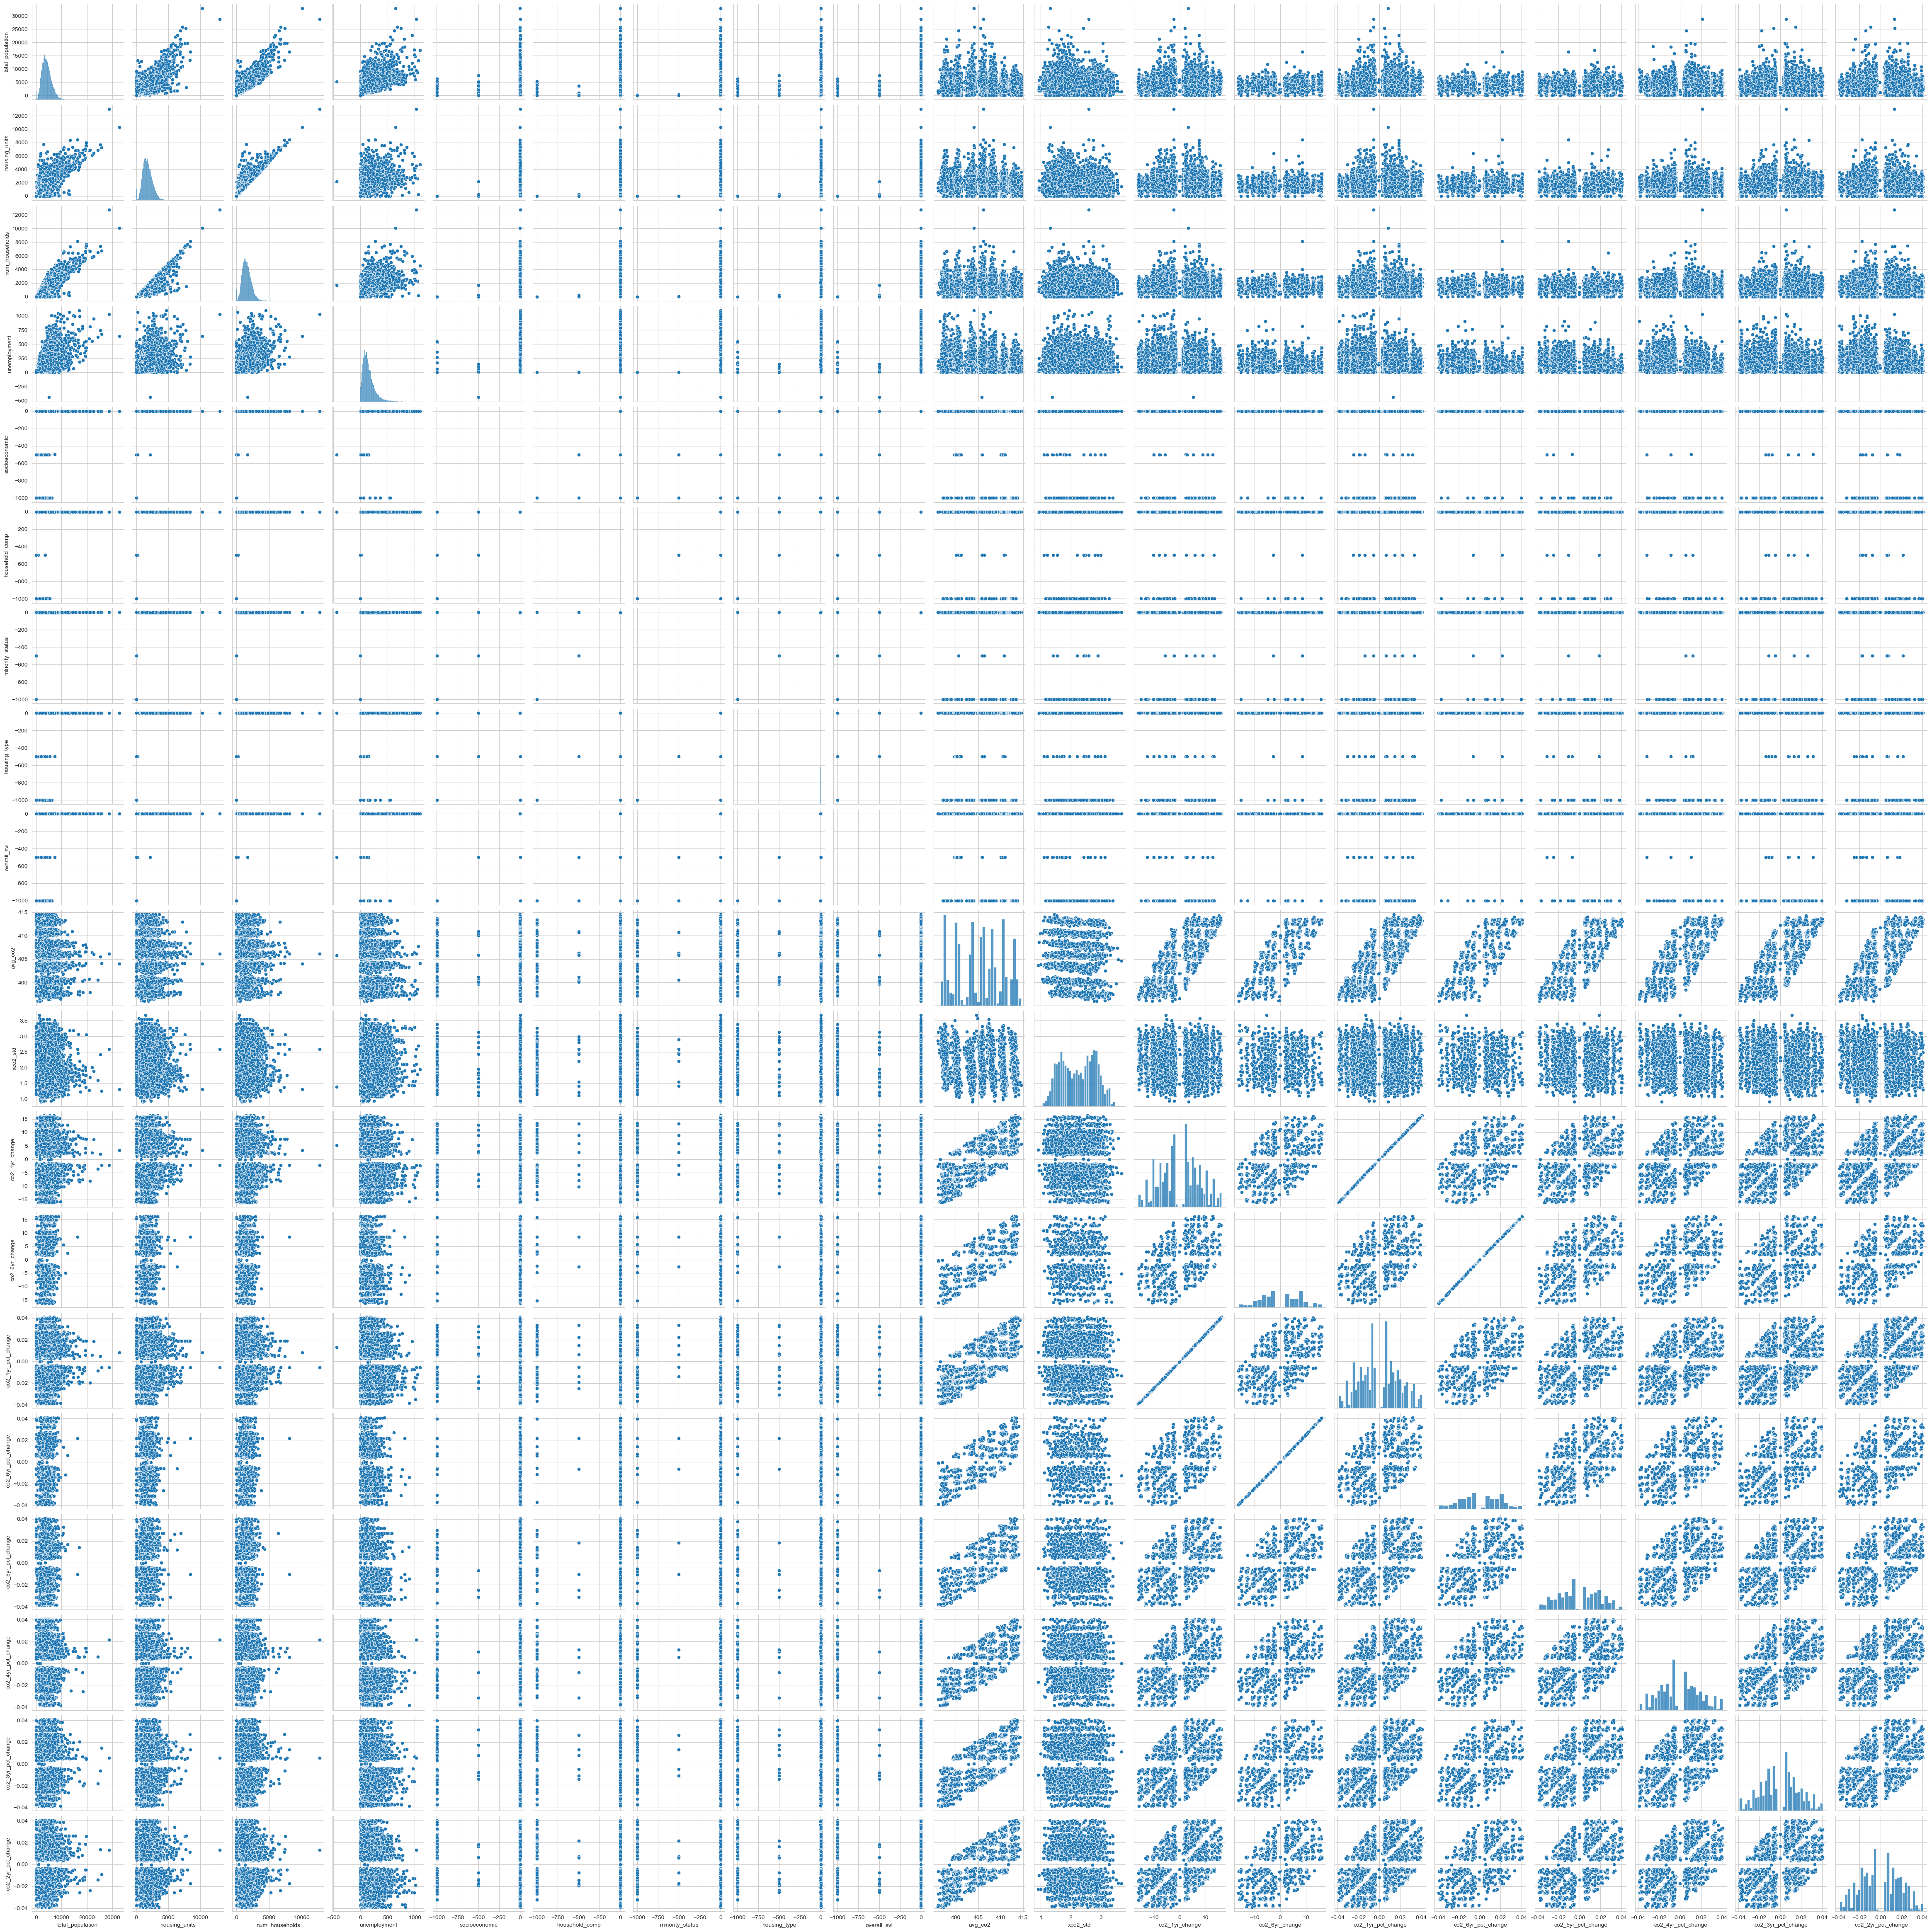

In [168]:
#pair plot of all c02 vars and svivars

pair_plot = sns.pairplot(small_df[vars])
pair_plot.show()
pair_plot.savefig('pairplot.png')

In [ ]:
#correlation plot
corr = df[vars].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [10]:
#scalling the small sample and replotting correlations
scaled_df = small_df[vars]
columns = scaled_df.columns

#Initialize scaler
scaler = StandardScaler()

#scale the data
scaled_df = pd.DataFrame(scaler.fit_transform(scaled_df))

#Rename plot_df's columns
scaled_df.columns = columns

<Axes: >

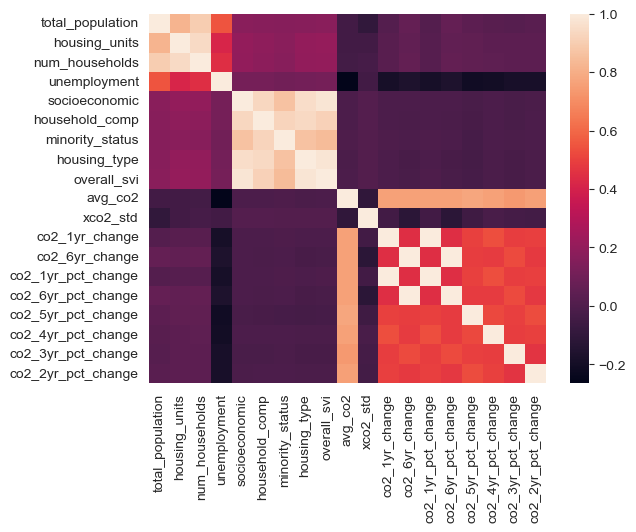

In [48]:
#correlation plot
corr = scaled_df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

# Cluster Analysis

Trial run of dbscan on scaled_df which is  a 20,000 sample that has been scaled

In [11]:
scaled_df.columns

Index(['total_population', 'housing_units', 'num_households', 'unemployment',
       'socioeconomic', 'household_comp', 'minority_status', 'housing_type',
       'overall_svi', 'avg_co2', 'xco2_std', 'co2_1yr_change',
       'co2_6yr_change', 'co2_1yr_pct_change', 'co2_6yr_pct_change',
       'co2_5yr_pct_change', 'co2_4yr_pct_change', 'co2_3yr_pct_change',
       'co2_2yr_pct_change'],
      dtype='object')

In [12]:
scaled_df.isna().sum()

total_population          0
housing_units             0
num_households            0
unemployment              0
socioeconomic             0
household_comp            0
minority_status           0
housing_type              0
overall_svi               0
avg_co2                   0
xco2_std                  0
co2_1yr_change         3004
co2_6yr_change        17431
co2_1yr_pct_change     3004
co2_6yr_pct_change    17431
co2_5yr_pct_change    14917
co2_4yr_pct_change    11973
co2_3yr_pct_change     9005
co2_2yr_pct_change     6043
dtype: int64

In [13]:
cluster1_df = scaled_df[['total_population', 'housing_units', 'num_households', 'unemployment',
'socioeconomic', 'household_comp', 'minority_status', 'housing_type','avg_co2', 'xco2_std', 'co2_1yr_change', 'co2_1yr_pct_change']]


In [14]:
cluster1_df.dropna(inplace=True)

/var/folders/2n/1ydmmpks7h77zv7p1k6l11pc0000gn/T/ipykernel_7821/1187441596.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [15]:
cluster1_df.isna().sum()

total_population      0
housing_units         0
num_households        0
unemployment          0
socioeconomic         0
household_comp        0
minority_status       0
housing_type          0
avg_co2               0
xco2_std              0
co2_1yr_change        0
co2_1yr_pct_change    0
dtype: int64

In [16]:
# Using KNN to find optimal epsilon
neigh = NearestNeighbors(n_neighbors=len(cluster1_df.columns*2))
nbrs = neigh.fit(cluster1_df)
distances, indices = nbrs.kneighbors(cluster1_df)

In [17]:
#sorting and filtering disances only
distances = np.sort(distances, axis=0)
distances = distances[:,1]

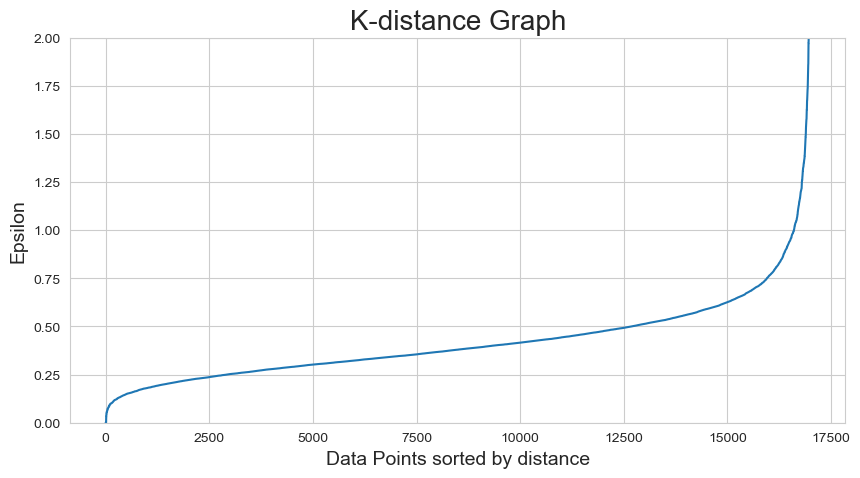

In [18]:
# Plotting K-distance Graph
plt.figure(figsize=(10,5))
plt.plot(distances)
plt.ylim(0,2)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [19]:
#plot number of outliers for dbscan epsilon values
outliers_pct = []
num_outliers = []

for eps in np.linspace(.5, 5, 100):
    dbscan = DBSCAN(eps = eps)
    dbscan.fit(cluster1_df)

    num_outliers.append(np.sum(dbscan.labels_ ==-1))

    pct_outlier = 100 * np.sum(dbscan.labels_ ==-1) / len(dbscan.labels_)
    outliers_pct.append(pct_outlier)

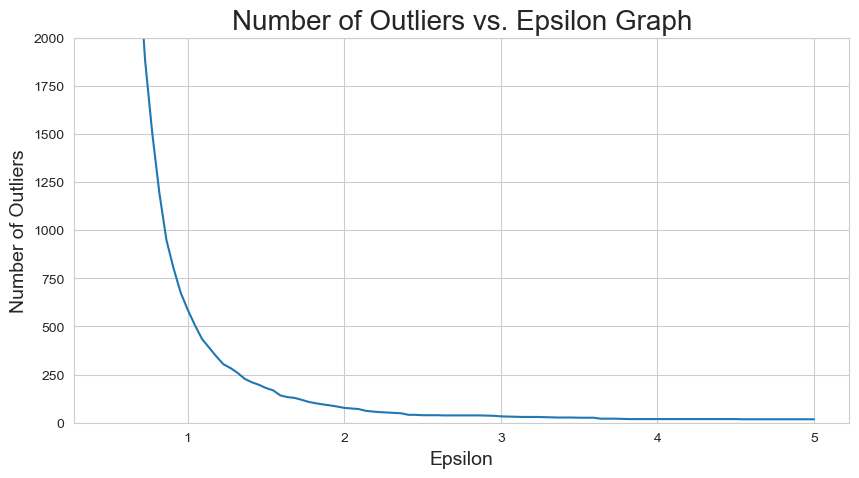

In [27]:
# Plotting Number of Outliers Graph
plt.figure(figsize=(10,5))
plt.plot((np.linspace(.5, 5, 100)), num_outliers)
plt.ylim(0,2000)
plt.title('Number of Outliers vs. Epsilon Graph',fontsize=20)
plt.xlabel('Epsilon',fontsize=14)
plt.ylabel('Number of Outliers',fontsize=14)
plt.show()

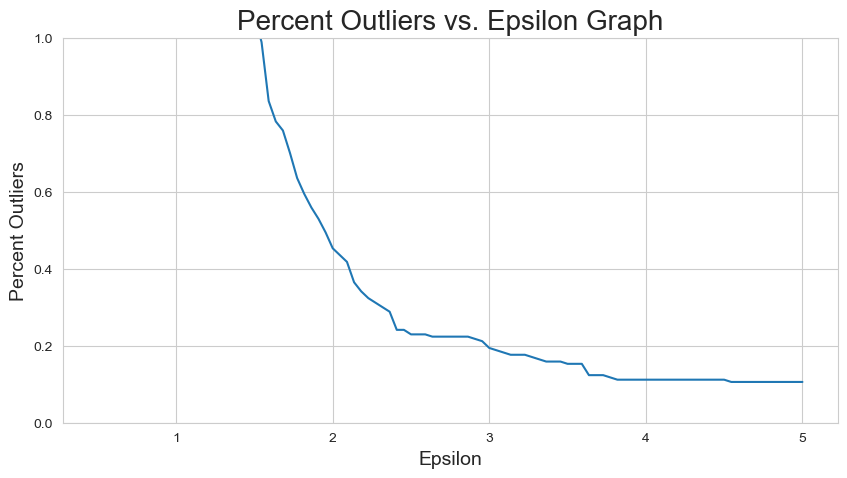

In [28]:
# Plotting Percent Outliers Graph
plt.figure(figsize=(10,5))
plt.plot((np.linspace(.5, 5, 100)), outliers_pct)
plt.ylim(0,1)
plt.title('Percent Outliers vs. Epsilon Graph',fontsize=20)
plt.xlabel('Epsilon',fontsize=14)
plt.ylabel('Percent Outliers',fontsize=14)
plt.show()

In [29]:
len(cluster1_df.columns)*2

24

In [30]:
#run DBSCAN
eps = 2.5
min_samples = 40

dbscan1 = DBSCAN(eps = eps, min_samples = min_samples)
dbscan1.fit(cluster1_df)

DBSCAN(eps=2.5, min_samples=40)

In [31]:
cluster1_df['Cluster']=dbscan1.labels_
cluster1_df['Cluster'].value_counts()

/var/folders/2n/1ydmmpks7h77zv7p1k6l11pc0000gn/T/ipykernel_7821/933851004.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



 0    16795
-1      106
 1       95
Name: Cluster, dtype: int64

In [32]:
labels1 = dbscan1.labels_
# measure the performance of dbscan algo
# Identifying which points make up our “core points”
core_samples1 = np.zeros_like(labels1, dtype=bool)
core_samples1[dbscan1.core_sample_indices_] = True
print(core_samples1)

#Calculating "the number of clusters"
n_clusters_ = len(set(labels1)) - (1 if -1 in labels1 else 0)
print(n_clusters_)

#Computing "the Silhouette Score"
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(cluster1_df, labels1))

[ True  True  True ...  True  True  True]
2
Silhouette Coefficient: 0.724


Cluster 2

In [33]:
df.columns

Index(['longitude', 'latitude', 'avg_co2', 'xco2_std', 'year', 'ST', 'STATE',
       'ST_ABBR', 'STCNTY', 'COUNTY', 'FIPS', 'LOCATION', 'year.1',
       'total_population', 'housing_units', 'num_households', 'unemployment',
       'socioeconomic', 'household_comp', 'minority_status', 'housing_type',
       'overall_svi', 'co2_1yr_change', 'co2_6yr_change', 'co2_1yr_pct_change',
       'co2_6yr_pct_change', 'co2_5yr_pct_change', 'co2_4yr_pct_change',
       'co2_3yr_pct_change', 'co2_2yr_pct_change'],
      dtype='object')

In [34]:
#scalling the small sample and replotting correlations
cluster2_df = pd.DataFrame(np.array(df.sample(20000)))

cluster2_df.columns

RangeIndex(start=0, stop=30, step=1)

In [35]:
#scalling the small sample and replotting correlations
cluster2_df = pd.DataFrame(np.array(df.sample(20000)))
cluster2_df.columns = df.columns

#select 'year' = 2020
cluster2_df = cluster2_df[cluster2_df["year"] == 2020]

# select columns
cluster2_df = cluster2_df[['avg_co2', 'xco2_std','total_population', 'housing_units','num_households', 'unemployment',
                           'socioeconomic', 'household_comp', 'minority_status', 'housing_type','overall_svi', 'co2_6yr_pct_change']]

#get column names
columns = cluster2_df.columns

#Initialize scaler
scaler = StandardScaler()

#scale the data
cluster2_df = pd.DataFrame(scaler.fit_transform(cluster2_df))

#Rename plot_df's columns
cluster2_df.columns = columns

In [36]:
cluster2_df.isna().sum()

avg_co2                  0
xco2_std                 0
total_population         0
housing_units            0
num_households           0
unemployment             0
socioeconomic            0
household_comp           0
minority_status          0
housing_type             0
overall_svi              0
co2_6yr_pct_change    2187
dtype: int64

In [37]:
cluster2_df.dropna(inplace=True)

In [38]:
#plot number of outliers for dbscan epsilon values
outliers_pct2 = []
num_outliers2 = []

for eps in np.linspace(.5, 5, 100):
    dbscan2 = DBSCAN(eps = eps)
    dbscan2.fit(cluster2_df)

    num_outliers2.append(np.sum(dbscan2.labels_ ==-1))

    pct_outlier2 = 100 * np.sum(dbscan2.labels_ ==-1) / len(dbscan2.labels_)
    outliers_pct2.append(pct_outlier2)

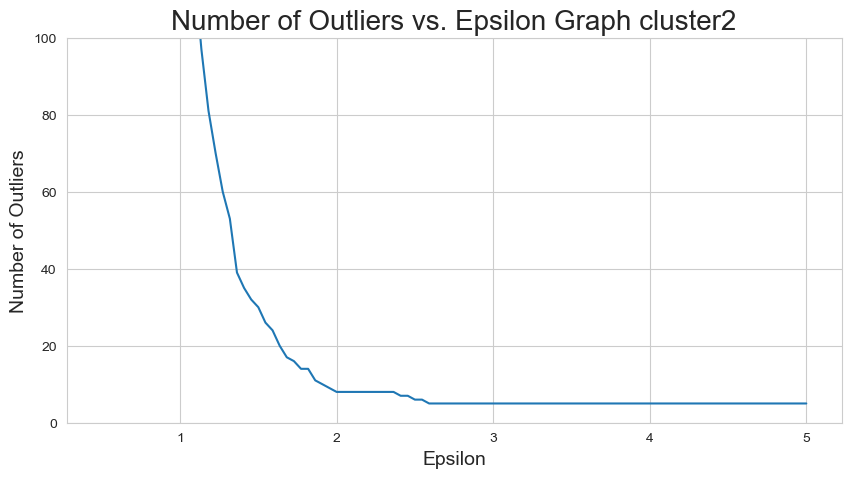

In [39]:
# Plotting Number of Outliers Graph
plt.figure(figsize=(10,5))
plt.plot((np.linspace(.5, 5, 100)), num_outliers2)
plt.ylim(0,100)
plt.title('Number of Outliers vs. Epsilon Graph cluster2',fontsize=20)
plt.xlabel('Epsilon',fontsize=14)
plt.ylabel('Number of Outliers',fontsize=14)
plt.show()

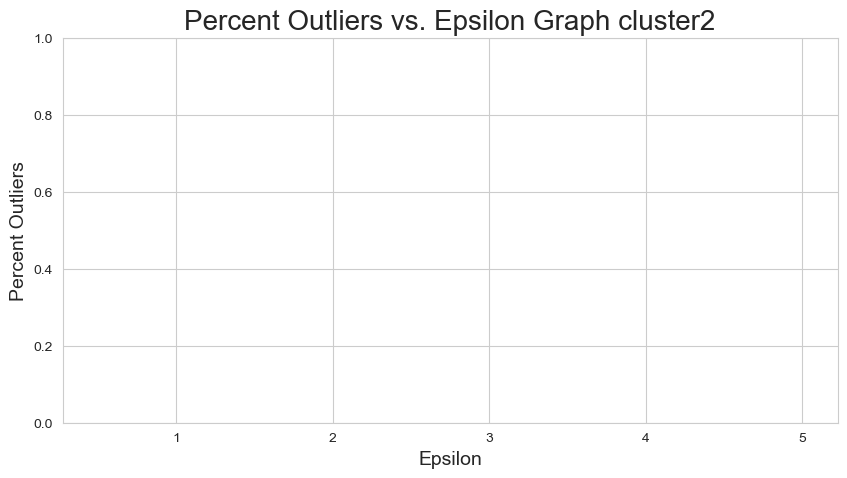

In [40]:
# Plotting Percent Outliers Graph
plt.figure(figsize=(10,5))
plt.plot((np.linspace(.5, 5, 100)), outliers_pct2)
plt.ylim(0,1)
plt.title('Percent Outliers vs. Epsilon Graph cluster2',fontsize=20)
plt.xlabel('Epsilon',fontsize=14)
plt.ylabel('Percent Outliers',fontsize=14)
plt.show()

In [41]:
#run DBSCAN
eps = 2.5
min_samples = 15

dbscan2 = DBSCAN(eps = eps, min_samples = min_samples)
dbscan2.fit(cluster2_df)

DBSCAN(eps=2.5, min_samples=15)

In [42]:
cluster2_df['Cluster']=dbscan2.labels_
cluster2_df['Cluster'].value_counts()

 0    354
-1      7
Name: Cluster, dtype: int64

## Hierachical clustering
to investigate cluserability

In [82]:
import scipy.cluster.hierarchy as sch

In [83]:
cluster2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361 entries, 0 to 2541
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   avg_co2             361 non-null    float64
 1   xco2_std            361 non-null    float64
 2   total_population    361 non-null    float64
 3   housing_units       361 non-null    float64
 4   num_households      361 non-null    float64
 5   unemployment        361 non-null    float64
 6   socioeconomic       361 non-null    float64
 7   household_comp      361 non-null    float64
 8   minority_status     361 non-null    float64
 9   housing_type        361 non-null    float64
 10  overall_svi         361 non-null    float64
 11  co2_6yr_pct_change  361 non-null    float64
 12  Cluster             361 non-null    int64  
dtypes: float64(12), int64(1)
memory usage: 39.5 KB


In [84]:
cluster2_data = cluster2_df.iloc[:,[4,5,6,7,8,9,11]].values

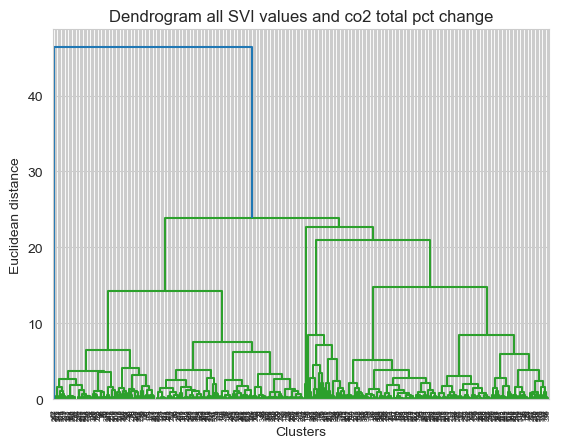

In [85]:
dendrogrm = sch.dendrogram(sch.linkage(cluster2_data, method = 'ward'))
plt.title('Dendrogram all SVI values and co2 total pct change')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distance')
plt.show()

In [ ]:
cluster3_data = cluster2_df.iloc[:,[4,5,6,7,8,9]].values


# Feature Engineering with centroid analysis

In [43]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from pandas import DataFrame
from numpy import random
from sklearn.cluster import KMeans

In [44]:
df.columns

Index(['longitude', 'latitude', 'avg_co2', 'xco2_std', 'year', 'ST', 'STATE',
       'ST_ABBR', 'STCNTY', 'COUNTY', 'FIPS', 'LOCATION', 'year.1',
       'total_population', 'housing_units', 'num_households', 'unemployment',
       'socioeconomic', 'household_comp', 'minority_status', 'housing_type',
       'overall_svi', 'co2_1yr_change', 'co2_6yr_change', 'co2_1yr_pct_change',
       'co2_6yr_pct_change', 'co2_5yr_pct_change', 'co2_4yr_pct_change',
       'co2_3yr_pct_change', 'co2_2yr_pct_change'],
      dtype='object')

In [45]:
# Pivot the dataframe to multi-tiered panel data
pivoted_df = df[['FIPS','avg_co2', 'xco2_std', 'year','total_population', 'housing_units', 'num_households', 'unemployment','socioeconomic', 'household_comp', 'minority_status', 'housing_type']].pivot_table(index='FIPS', columns='year')

pivoted_df.dropna(inplace=True)

pivoted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61346 entries, 1001020100 to 56045951300
Data columns (total 70 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   (avg_co2, 2014)           61346 non-null  float64
 1   (avg_co2, 2015)           61346 non-null  float64
 2   (avg_co2, 2016)           61346 non-null  float64
 3   (avg_co2, 2017)           61346 non-null  float64
 4   (avg_co2, 2018)           61346 non-null  float64
 5   (avg_co2, 2019)           61346 non-null  float64
 6   (avg_co2, 2020)           61346 non-null  float64
 7   (household_comp, 2014)    61346 non-null  float64
 8   (household_comp, 2015)    61346 non-null  float64
 9   (household_comp, 2016)    61346 non-null  float64
 10  (household_comp, 2017)    61346 non-null  float64
 11  (household_comp, 2018)    61346 non-null  float64
 12  (household_comp, 2019)    61346 non-null  float64
 13  (household_comp, 2020)    61346 non-null  floa

In [46]:
# scaling the data
# initialize scaler
scaler = StandardScaler()

pivot_scaled_df = pivoted_df.copy()

# keep column names
pivot_scaled_df.columns = pivoted_df.columns

# scale the data
pivot_scaled_df = pd.DataFrame(scaler.fit_transform(pivot_scaled_df))

# rename columns
pivot_scaled_df.columns = pivot_scaled_df.columns

In [24]:
def hopkins(df,m):

    d = len(df.columns) # columns
    n = len(df) # rows

    df = (df - df.min())/(df.max()-df.min()) *2 -1
    df = df / df.std()


    knn = NearestNeighbors(n_neighbors=2).fit(df)

    rand_df = DataFrame(random.rand(m,d),index = range(0,m),columns =df.columns )
    rand_df = rand_df*2-1
    rand_df = rand_df * df.abs().max()

    ujd = []
    wjd = []

    for j in range(0, m):
        u_dist, _ = knn.kneighbors([rand_df.iloc[j]])
        ujd.append(u_dist[0][0])

        w_dist, _ = knn.kneighbors(df.sample(1))
        wjd.append(w_dist[0][1])

    return(sum(ujd) / (sum(ujd) + sum(wjd)))

In [25]:
# checking hopinks score for clusterability
hopkins(pivot_scaled_df,10)

0.9704243576948036

In [83]:
kmeans = KMeans(n_clusters=7).fit(pivot_scaled_df)

# Cluster membership
memb = pd.Series(kmeans.labels_, index= pivot_scaled_df.index)
for key, item in memb.groupby(memb):
    print(key,item.index)

/Users/joannarashid/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



0 Int64Index([   11,    16,    18,    23,    25,    26,    59,    65,    79,
               89,
            ...
            61257, 61275, 61295, 61299, 61305, 61314, 61315, 61320, 61323,
            61326],
           dtype='int64', length=8303)
1 Int64Index([   40,    57,   305,   482,   492,   508,   510,   511,   512,
              513,
            ...
            61217, 61218, 61219, 61221, 61226, 61228, 61231, 61268, 61277,
            61283],
           dtype='int64', length=14056)
2 Int64Index([    3,    27,    31,    38,    47,    58,    61,    64,    66,
               68,
            ...
            61296, 61302, 61308, 61311, 61317, 61321, 61324, 61325, 61327,
            61345],
           dtype='int64', length=17260)
3 Int64Index([   74,    75,   685,   837,  1176,  1996,  1999,  2371,  2372,
             3544,
            ...
            57990, 58138, 58139, 58140, 58457, 58587, 60194, 60195, 60771,
            61298],
           dtype='int64', length=325)
4 Int64Index([ 

## Fowlkes-Mallows score

In [53]:
from numpy import sqrt
from pandas import Series

def countpairs(Clustering1,Clustering2):
    from pandas import Series

    output = Series(0,index=['N00','N01','N10','N11'])

    for i in range(0,10):
        for j in range(0,i):
            if(i!=j):

                c1_same = False
                c2_same = False
                c1_Not_same = False
                c2_Not_same = False

                if(Clustering1[i]==Clustering1[j]):
                    c1_same=True
                else:
                    c1_Not_same=True
                if(Clustering2[i]==Clustering2[j]):
                    c2_same=True
                else:
                    c2_Not_same = True

                if(c1_same & c2_same):
                    output.N11 = output.N11 +1
                if(c1_Not_same & c2_Not_same):
                    output.N00 = output.N00 +1
                if(c1_same & c2_Not_same):
                    output.N10 = output.N10 +1
                if(c1_Not_same & c2_same):
                    output.N01 = output.N01 +1

    return(output)

def fowlkes_mallows(Clustering1,Clustering2):

    p = countpairs(Clustering1,Clustering2)

    return(p.N11/((p.N11+p.N01)+(p.N11+p.N10)))

In [54]:
kmeans = KMeans(n_clusters=7)
Clustering1 = kmeans.fit(pivot_scaled_df).labels_
Clustering2 = kmeans.fit(pivot_scaled_df).labels_

print('fowlkes_mallows: {}'.format(fowlkes_mallows(Clustering1,Clustering2)))

/Users/joannarashid/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/joannarashid/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



fowlkes_mallows: 0.5


In [ ]:
for i in range(0,20):
    Clustering1 = kmeans.fit(pivot_scaled_df).labels_
    Clustering2 = kmeans.fit(pivot_scaled_df).labels_

    print('fowlkes_mallows: {}'.format(fowlkes_mallows(Clustering1,Clustering2)))
    print('----------------')

## Find number of clusters using SSE

In [ ]:
repetitions = ['R{}'.format(i) for i in range(1,10)]

SSE_results = pd.DataFrame(0.0, index = range(2,15),
                           columns= repetitions)


for n_cluster in SSE_results.index:
    for col in SSE_results.columns:
        algort = KMeans(n_clusters=n_cluster).fit(pivot_scaled_df)
        SSE_results.at[n_cluster,col] = algort.inertia_
        # Inertia: Sum of distances of samples to their closest cluster center

SSE_results['Mean'] = SSE_results[repetitions].mean(axis=1)
SSE_results['Var'] = SSE_results[repetitions].var(axis=1)
SSE_results.sort_values('Mean')

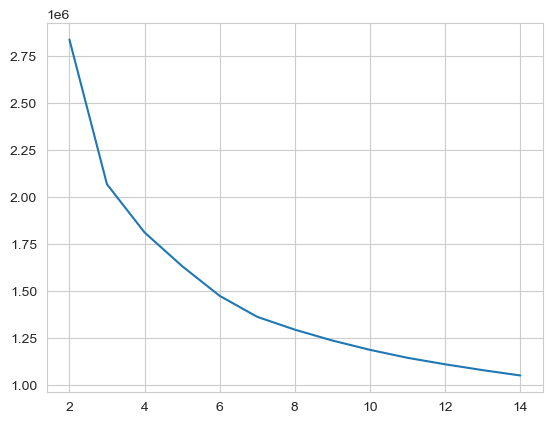

In [57]:
# plot SSE
(SSE_results.Mean).plot()
plt.show()

## Silhoutte score

In [59]:
from sklearn.metrics import silhouette_score

In [81]:
repetitions = ['R{}'.format(i) for i in range(1,10)]

SIL_results = pd.DataFrame( index = range(2,15),
                            columns= repetitions)


for n_cluster in SIL_results.index:
    for col in SIL_results.columns:
        algort = KMeans(n_clusters=n_cluster).fit(pivot_scaled_df)
        SIL_results.at[n_cluster,col] = silhouette_score(pivot_scaled_df,algort.labels_)

SIL_results['Mean'] = SIL_results[repetitions].mean(axis=1)
SIL_results['Var'] = SIL_results[repetitions].var(axis=1)
SIL_results.sort_values('Mean',ascending=False)

/Users/joannarashid/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/joannarashid/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/joannarashid/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/joannarashid/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/joannarashid/anaconda3/lib/python3.10/site-pa

R1        R2        R3        R4        R5        R6        R7  \
2   0.859604  0.859604  0.859604  0.859604  0.859604  0.859604  0.859604   
3   0.263068  0.263017  0.263091  0.263034  0.263156  0.263124  0.263073   
4   0.222101  0.222101  0.222101  0.222101  0.222101   0.22208  0.222101   
6   0.197291  0.197304  0.197136  0.197288  0.197291  0.197096  0.197137   
5   0.195258  0.195259  0.195249  0.195252  0.195257  0.195258   0.19525   
7   0.189559  0.189825  0.189565  0.189559   0.18956  0.190069  0.189563   
8   0.172301  0.172301  0.172301  0.172757  0.172288  0.172879  0.172438   
9   0.169511  0.169511  0.169463  0.169511  0.169382   0.16951   0.16947   
10  0.163848  0.164014  0.164997  0.164996  0.163897  0.163909  0.163914   
11  0.160687  0.160602  0.160769  0.160857  0.160856  0.160746  0.160687   
12    0.1562  0.156246  0.156249  0.156199  0.156196  0.156292  0.156215   
13  0.157086  0.157309  0.151908  0.152066  0.147957  0.157138  0.152777   
14  0.146153  0.149443  0.152267  0.152574   0.15282  0.147847  0.146012   

          R8        R9      Mean           Var  
2   0.859604  0.859604  0.859604  0.000000e+00  
3   0.263073  0.263124  0.263084  1.970021e-09  
4   0.222111  0.222101  0.222100  6.601965e-11  
6   0.197109  0.197246  0.197211  7.910161e-09  
5   0.195257  0.195249  0.195254  1.672042e-11  
7    0.18956  0.189561  0.189647  3.270417e-08  
8   0.172294  0.172295  0.172428  5.191960e-08  
9   0.169512  0.169441  0.169479  2.031676e-09  
10  0.163843  0.163941  0.164151  2.322742e-07  
11  0.160854  0.160857  0.160768  8.981864e-09  
12  0.156208  0.156251  0.156228  1.081124e-09  
13  0.152833  0.152779  0.153539  9.673241e-06  
14  0.153003   0.15265  0.150308  8.819306e-06

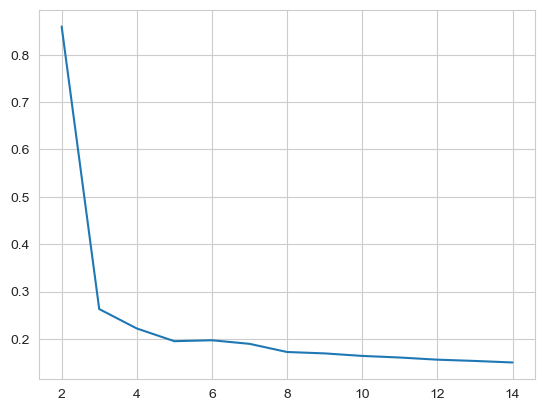

In [86]:
SIL_results.Mean.plot()
plt.show()

In [ ]:
# K means based on optimal cluster number
kmeans = KMeans(n_clusters= 4)

# Cluster membership
for i in range(0,20):
    Clustering1 = kmeans.fit(pivot_scaled_df).labels_
    Clustering2 = kmeans.fit(pivot_scaled_df).labels_

    print('fowlkes_mallows: {}'.format(fowlkes_mallows(Clustering1,Clustering2)))
    print('----------------')

In [67]:
kmeans = KMeans(n_clusters=4).fit(pivot_scaled_df)
memb =  pd.Series(kmeans.labels_, index=pivot_scaled_df.index)

/Users/joannarashid/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



## Centroid Analysis IN PROGRESS

In [79]:
pivoted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61346 entries, 1001020100 to 56045951300
Data columns (total 70 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   (avg_co2, 2014)           61346 non-null  float64
 1   (avg_co2, 2015)           61346 non-null  float64
 2   (avg_co2, 2016)           61346 non-null  float64
 3   (avg_co2, 2017)           61346 non-null  float64
 4   (avg_co2, 2018)           61346 non-null  float64
 5   (avg_co2, 2019)           61346 non-null  float64
 6   (avg_co2, 2020)           61346 non-null  float64
 7   (household_comp, 2014)    61346 non-null  float64
 8   (household_comp, 2015)    61346 non-null  float64
 9   (household_comp, 2016)    61346 non-null  float64
 10  (household_comp, 2017)    61346 non-null  float64
 11  (household_comp, 2018)    61346 non-null  float64
 12  (household_comp, 2019)    61346 non-null  float64
 13  (household_comp, 2020)    61346 non-null  floa

In [68]:
pivot_scaled_df

0         1         2         3        4         5         6   \
0 -0.338358 -0.060925 -0.084138 -1.445373 -1.04345 -0.595905 -0.216128   
1 -0.338358 -0.060925 -0.084138 -1.445373 -1.04345 -0.595905 -0.216128   
2 -0.338358 -0.060925 -0.084138 -1.445373 -1.04345 -0.595905 -0.216128   
3 -0.338358 -0.060925 -0.084138 -1.445373 -1.04345 -0.595905 -0.216128   
4 -0.338358 -0.060925 -0.084138 -1.445373 -1.04345 -0.595905 -0.216128   

         7         8         9   ...        60        61        62        63  \
0  0.068794  0.077711  0.079145  ... -0.955177 -1.079643 -1.043052 -0.603664   
1  0.068841  0.080397  0.083896  ... -0.955177 -1.012393 -0.919087 -0.603664   
2  0.076319  0.084454  0.084667  ... -0.727864 -0.743392 -0.648619 -0.603664   
3  0.075308  0.084772  0.086109  ... -0.796057 -0.865665 -0.806392 -0.603664   
4  0.075529  0.083518  0.083680  ... -0.102753 -0.523301 -0.862740 -0.603664   

         64       65        66        67        68        69  
0 -0.429223 -1.85179 -0.170857 -0.243099 -0.834253 -0.861728  
1 -0.429223 -1.85179 -0.170857 -0.243099 -0.834253 -0.861728  
2 -0.429223 -1.85179 -0.170857 -0.243099 -0.834253 -0.861728  
3 -0.429223 -1.85179 -0.170857 -0.243099 -0.834253 -0.861728  
4 -0.429223 -1.85179 -0.170857 -0.243099 -0.834253 -0.861728  

[5 rows x 70 columns]

In [75]:
clusters = ['Cluster {}'.format(i) for i in range(4)]
Centroids_orig = pd.DataFrame(0.0, index = clusters,
                              columns = pivoted_df.columns)

Centroids_std = pd.DataFrame(0.0, index =  clusters,
                             columns = pivoted_df.columns)
for i in range(4):
    BM = memb==i
    Centroids_orig.iloc[i] = pivot_scaled_df[BM].median(axis=0)
    Centroids_std.iloc[i] = pivot_scaled_df[BM].mean(axis=0)

Centroids_orig

avg_co2                                                    \
year           2014      2015      2016      2017      2018      2019   
Cluster 0 -0.181824 -0.102850 -0.084138 -0.039914 -0.052998 -0.083152   
Cluster 1  0.585759  0.783190  0.733344  0.869164  0.599578  0.817621   
Cluster 2 -0.427800 -0.513194 -0.462633 -0.350055 -0.391019 -0.440328   
Cluster 3 -0.171057  0.072146  0.231202  0.095384  0.061294 -0.047192   

                    household_comp                        ... unemployment  \
year           2020           2014       2015       2016  ...         2018   
Cluster 0 -0.026824       0.070822   0.080387   0.082137  ...     0.295045   
Cluster 1  0.580671       0.071434   0.080991   0.082662  ...    -0.307334   
Cluster 2 -0.399377       0.071337   0.080882   0.082579  ...    -0.500550   
Cluster 3  0.087097     -14.054447 -13.612874 -12.131649  ...    -1.352974   

                               xco2_std                                \
year           2019      2020      2014      2015      2016      2017   
Cluster 0  0.320381  0.219135  0.155734  0.305452  0.229538  0.271503   
Cluster 1 -0.297097 -0.299263 -1.207957 -1.145110 -1.085898 -1.035248   
Cluster 2 -0.511074 -0.490845  0.754766  0.781124  0.822683  0.638224   
Cluster 3 -1.403665 -1.245903 -0.238415 -0.160707 -0.319001 -0.048061   

                                         
year           2018      2019      2020  
Cluster 0  0.052171  0.055475  0.163138  
Cluster 1 -1.059994 -1.089109 -1.120875  
Cluster 2  0.766358  0.649614  0.823821  
Cluster 3 -0.188688 -0.370422 -0.197550  

[4 rows x 70 columns]

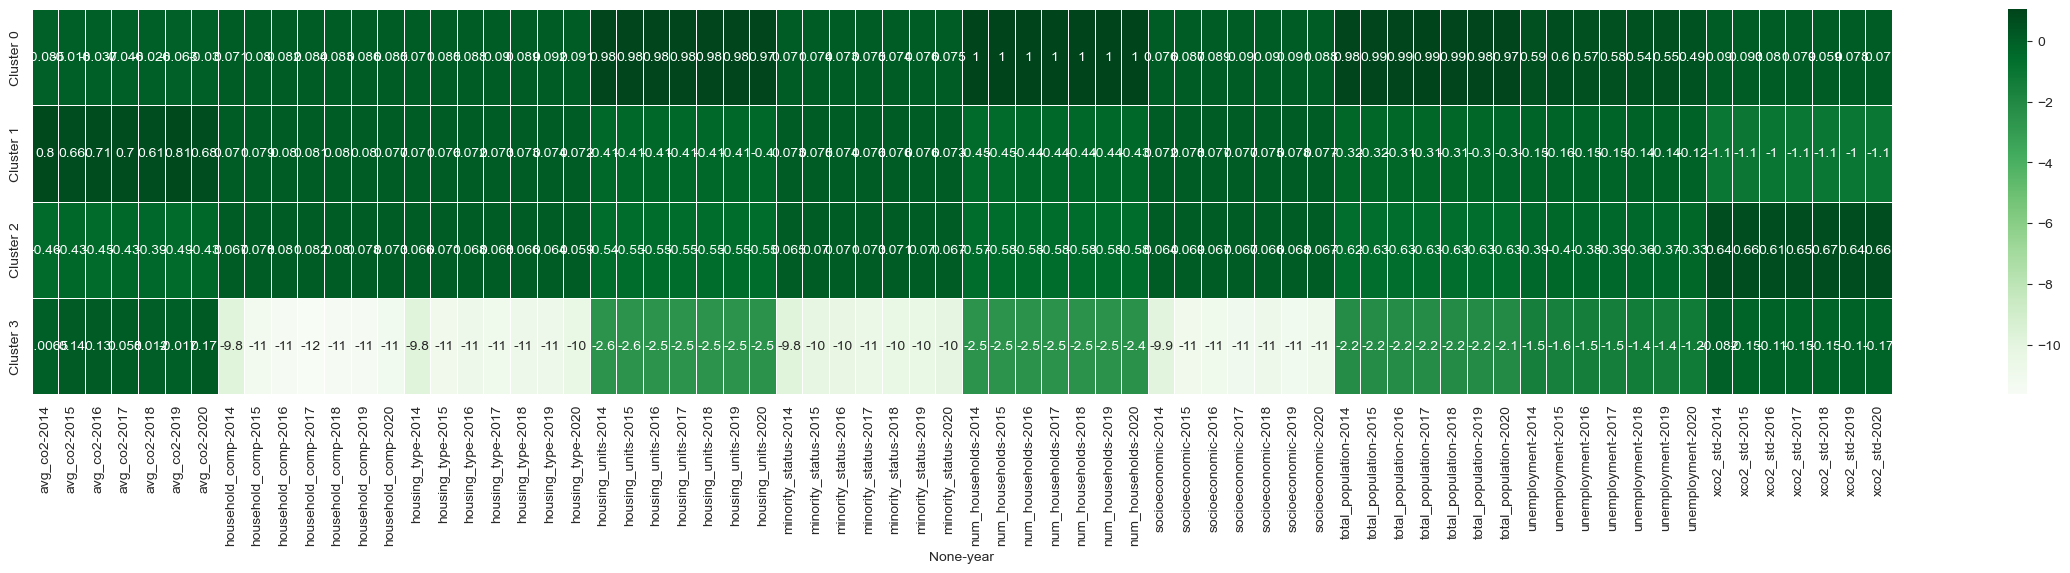

In [77]:
plt.figure(figsize=(30,5))
sns.heatmap(Centroids_std, linewidths=.5, annot=True,
            cmap='Greens')
plt.show()

# TS Fresh feature engineering IN PROGRESS
currently not working need to figure out why index ID are not matching when I run feature extraction

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from tsfresh.examples import load_robot_execution_failures
from tsfresh.transformers import RelevantFeatureAugmenter
import pandas as pd

AttributeError: partially initialized module 'numba' has no attribute 'core' (most likely due to a circular import)

In [200]:
#Example case from literature
# Download dataset
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures
download_robot_execution_failures()

pipeline = Pipeline([
    ('augmenter', RelevantFeatureAugmenter(column_id='id', column_sort='time')),
    ('classifier', RandomForestClassifier()),
])

df_ts, y = load_robot_execution_failures()
X = pd.DataFrame(index=y.index)

pipeline.set_params(augmenter__timeseries_container=df_ts)
pipeline.fit(X, y)

In [206]:
#ctreating timeseries df
df_ts = df[['FIPS','year','avg_co2', 'xco2_std','total_population', 'housing_units','num_households', 'unemployment','socioeconomic', 'household_comp', 'minority_status', 'housing_type','overall_svi']]

# sort by FIPS then year and reset index
df_ts = df_ts.sort_values(['FIPS', 'year']).reset_index(drop=True)

df_ts.head()

FIPS  year     avg_co2  xco2_std  total_population  housing_units  \
0  1001020100  2014  397.493357  2.061153            1900.0          714.0   
1  1001020100  2015  400.242485  2.007512            1955.0          732.5   
2  1001020100  2016  403.473628  1.196374            2010.0          751.0   
3  1001020100  2017  405.425649  2.223056            1966.5          765.0   
4  1001020100  2018  407.631518  2.148360            1923.0          779.0   

   num_households  unemployment  socioeconomic  household_comp  \
0           688.0          48.0        0.43990         0.34030   
1           714.0          45.5        0.41425         0.28785   
2           740.0          43.0        0.38860         0.23540   
3           752.5          39.0        0.38995         0.39755   
4           765.0          35.0        0.39130         0.55970   

   minority_status  housing_type  overall_svi  
0          0.31340       0.36340      0.34660  
1          0.34945       0.23410      0.26925  
2          0.38550       0.10480      0.19190  
3          0.37950       0.10205      0.22260  
4          0.37350       0.09930      0.25330

In [208]:
#scalling the data
df_ts_scaled = df_ts.copy()

columns = df_ts_scaled.columns

#Initialize scaler
scaler = StandardScaler()

#scale the data all columns except FIPS and year
df_ts_scaled.iloc[:,2:] = scaler.fit_transform(df_ts_scaled.iloc[:,2:])

#Rename plot_df's columns
df_ts_scaled.columns = columns

y = pd.Series(df_ts_scaled['avg_co2'])

#eliminate avg_co2 and xco2_std
df_ts_scaled = df_ts_scaled.drop(['avg_co2', 'xco2_std'], axis=1)

In [209]:
#convert to long df with FIPS , year, kind, value
df_ts_scaled = df_ts_scaled.melt(id_vars=['FIPS', 'year'], var_name='kind', value_name='value')

In [210]:
df_ts_scaled.head()

FIPS  year              kind     value
0  1001020100  2014  total_population -1.151048
1  1001020100  2015  total_population -1.124331
2  1001020100  2016  total_population -1.097613
3  1001020100  2017  total_population -1.118744
4  1001020100  2018  total_population -1.139875

In [212]:
pipeline = Pipeline([
    ('augmenter', RelevantFeatureAugmenter(column_id='FIPS', column_sort='year', column_kind="kind", column_value = "value")),
    ('classifier', RandomForestClassifier()),
])
y = y
X = pd.DataFrame(index=y.index)

pipeline.set_params(augmenter__timeseries_container = df_ts_scaled)
pipeline.fit(X, y)

AttributeError: The ids of the time series container and the index of the input data X do not share any identifier!